In [1]:
from wlclassifier import WLClassifier
from c2 import *
import networkx as nx

from sklearn.model_selection import train_test_split

In [2]:
from cProfile import Profile
from pstats import SortKey, Stats

We condsider the formula $\exists x\exists^{\geq 7}y E(x, y)$ and 100 binomial graphs with n=10, p=0.5.

In [3]:
phi = Exists(Var.x, (Exists(Var.y, E(Var.x, Var.y), 7)))

X = [nx.fast_gnp_random_graph(10, 0.5) for _ in range(100)]
y = [phi.evaluate(g) for g in X]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y.count(True)

48

First we fit a classifier that checks for occurrences of exact colors. 

In [4]:
clf = WLClassifier(depth=2, comparisons=[lambda x, y: x == y])
with Profile() as prof:
    clf.fit(X_train, y_train)
    (
        Stats(prof)
        .strip_dirs()
        .sort_stats(SortKey.CUMULATIVE)
        .print_stats(20)
    )

         4118517 function calls (1190915 primitive calls) in 1.642 seconds

   Ordered by: cumulative time
   List reduced from 304 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.170    0.170    1.374    1.374 wlclassifier.py:76(_transform)
   334400    0.114    0.000    1.172    0.000 3656221039.py:1(<lambda>)
3185179/351333    1.076    0.000    1.076    0.000 wlclassifier.py:265(__eq__)
     2402    0.005    0.000    0.201    0.000 {built-in method builtins.sorted}
     9986    0.005    0.000    0.186    0.000 wlclassifier.py:325(__lt__)
     9986    0.007    0.000    0.181    0.000 wlclassifier.py:303(__gt__)
54143/9986    0.106    0.000    0.164    0.000 wlclassifier.py:289(__ge__)
     2400    0.002    0.000    0.096    0.000 wlclassifier.py:253(__init__)
   243103    0.036    0.000    0.036    0.000 {built-in method builtins.len}
        3    0.000    0.000    0.023    0.008 base_events.py:1874(_run_once)
2605

Accuracy: 1.0


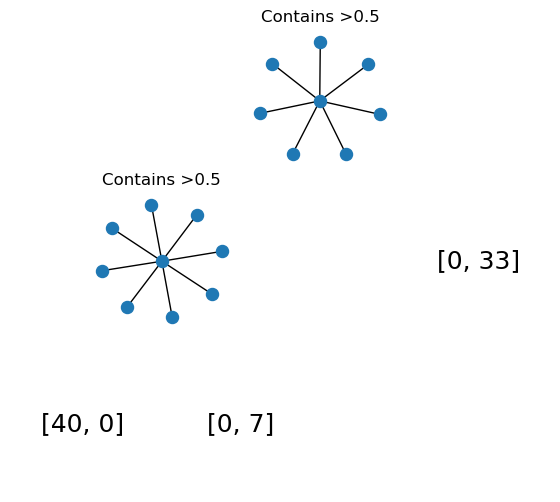

In [5]:
print("Accuracy:", clf.score(X_test, y_test))
clf.draw()

Next we check for occurrences of supercolors:

In [6]:
clf = WLClassifier(depth=2, comparisons=[lambda x, y: x >= y])
with Profile() as prof:
    clf.fit(X_train, y_train)
    (
        Stats(prof)
        .strip_dirs()
        .sort_stats(SortKey.CUMULATIVE)
        .print_stats(20)
    )

         20772149 function calls (17944785 primitive calls) in 8.600 seconds

   Ordered by: cumulative time
   List reduced from 292 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.211    0.211    8.332    8.332 wlclassifier.py:76(_transform)
3086349/344386    5.343    0.000    8.118    0.000 wlclassifier.py:289(__ge__)
   334400    0.132    0.000    8.084    0.000 3743835767.py:1(<lambda>)
 11651914    1.456    0.000    1.456    0.000 {built-in method builtins.len}
  2722878    0.722    0.000    0.722    0.000 {built-in method builtins.min}
  2722875    0.605    0.000    0.605    0.000 {built-in method builtins.all}
     2402    0.006    0.000    0.205    0.000 {built-in method builtins.sorted}
      160    0.023    0.000    0.194    0.001 wlclassifier.py:66(_wl_)
     9986    0.005    0.000    0.190    0.000 wlclassifier.py:325(__lt__)
     9986    0.007    0.000    0.185    0.000 wlclassifier.py:303(__gt__)
     

Accuracy: 1.0


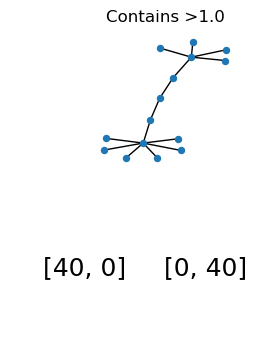

In [7]:
print("Accuracy:", clf.score(X_test, y_test))
clf.draw()